In [1]:
import pandas as pd


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
base_dados = pd.read_csv(r'C:\Users\win10\Desktop\curso_python\projetos dados\StudentsPerformance.csv')

In [4]:
base_dados.shape

(1000, 8)

In [5]:
base_dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
#Verificando campos nulos
nulos = base_dados.isnull()
nulos.sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
#Verificando campos unicos
base_dados.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
#Verificando dados duplicados
base_dados.duplicated().sum()

0

In [9]:
#Estatisticas
base_dados.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
#porcentagem do sexo dos alunos
base_dados['gender'].value_counts(normalize=True)*100

gender
female    51.8
male      48.2
Name: proportion, dtype: float64

In [11]:
#Porcentagem dos alunos que fizeram um curso preparatorio para o teste final
base_dados['test preparation course'].value_counts(normalize=True)*100

test preparation course
none         64.2
completed    35.8
Name: proportion, dtype: float64

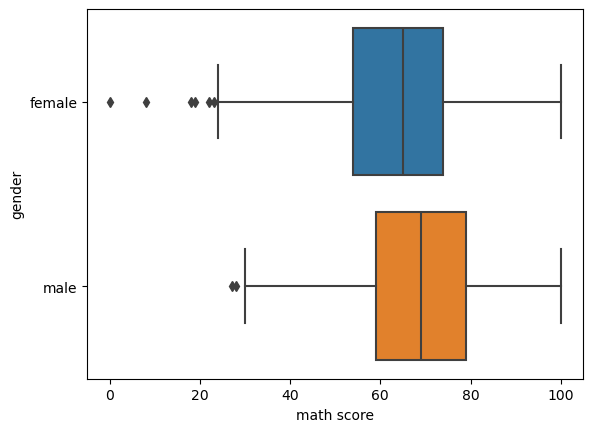

In [13]:
#grafico comparando sexo x nota de matematica
sns.boxplot(data=base_dados, x='math score', y='gender');

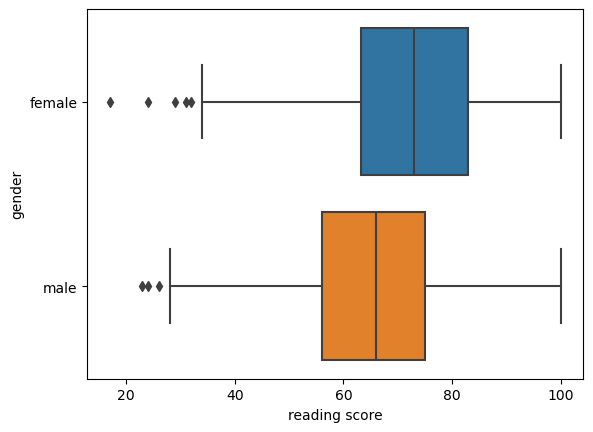

In [14]:
#grafico comparando sexo x nota de reading
sns.boxplot(data=base_dados, x='reading score', y='gender');

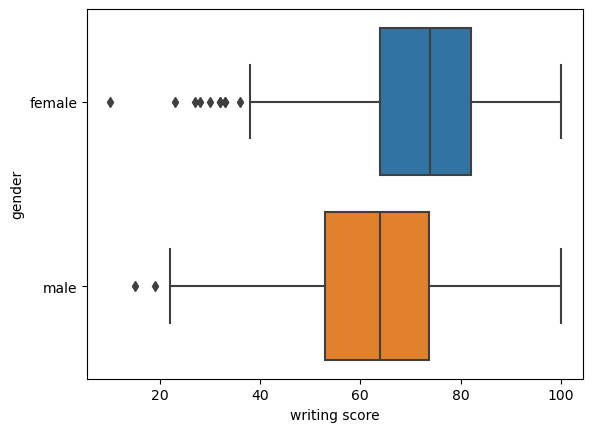

In [15]:
#grafico comparando sexo x nota de writing
sns.boxplot(data=base_dados, x='writing score', y='gender');

In [16]:
#comparando notas de matematicas no groupby entre homens e mulheres
base_dados.groupby(by=['gender']).describe()['math score'].reset_index()

,gender,count,mean,std,min,25%,50%,75%,max
0,female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
1,male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


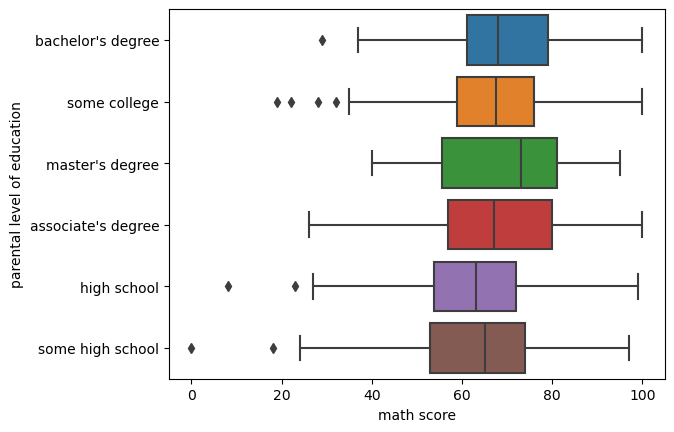

In [17]:
#Analisando se o nivel de educação dos pais impacta na nota de matematica dos alunos
sns.boxplot(data=base_dados, x='math score', y='parental level of education');

In [18]:
#Analisando se o nivel de educação dos pais impacta na nota de matematica dos alunos (2)
base_dados.groupby(by=['parental level of education']).describe()['math score'].reset_index()

,parental level of education,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
1,bachelor's degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
2,high school,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
3,master's degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0
4,some college,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
5,some high school,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0


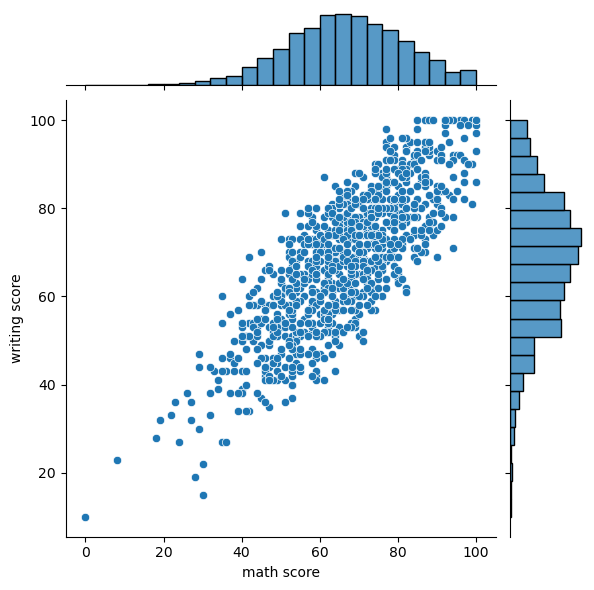

In [21]:
#Grafico comparando notas de matematica e writing
graph = sns.JointGrid(data=base_dados, x='math score', y='writing score')
graph.plot(sns.scatterplot, sns.histplot)